In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [0]:
CA0 = 1.5 # mol/L
CB0 = 2 # mol/L
Vdot = 10 # L/min
V = 50 # L
k1 = 0.25 # mol/(l.min)
k2 = 0.1 # mol/(l.min)
k3 = 5.0 # mol/(l.min)

In [0]:
def bilan(y, V, Vdot, k1, k2, k3):
  FA, FB, FC, FD, FE, FF = y
             
    
  CA = FA / Vdot
  CB = FB / Vdot
  CC = FC / Vdot
  CD = FD / Vdot
  CE = FE / Vdot
  CF = FF / Vdot

  r1 = k1 * CA * CB
  r2 = k2 * CA * CD
  r3 = k3 * CB**2 * CC

  RA = - r1 - 3 * r2
  RB = - 2 * r1 - r3
  RC = - 2 * r3 + r1 + r2
  RD = - 2 * r2 + r1 + r3
  RE = r2
  RF = r3

  dFA = RA
  dFB = RB
  dFC = RC
  dFD = RD
  dFE = RE
  dFF = RF
    
  return dFA, dFB, dFC, dFD, dFE, dFF

In [0]:
y0 = [Vdot * CA0, Vdot * CB0, 0, 0, 0, 0]

In [0]:
V = np.linspace(0, 50, 1000)

In [0]:
profils = odeint(bilan, y0, V, (Vdot, k1, k2, k3))

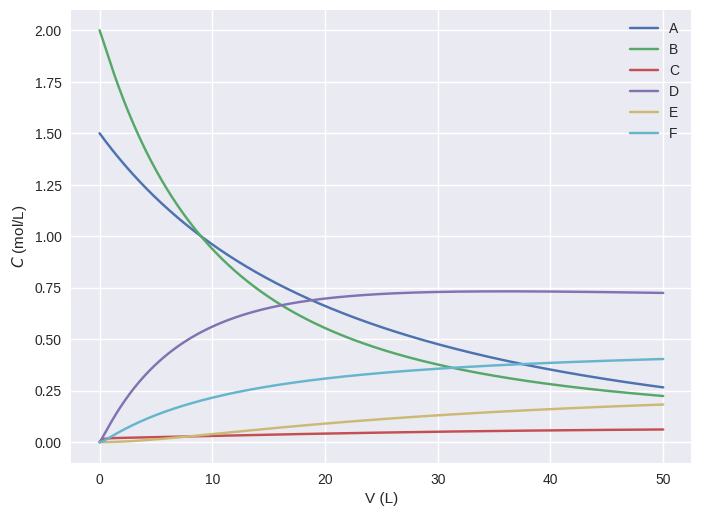

In [94]:
plt.figure(1, dpi=100, figsize=(8, 6))
plt.plot(V, profils/Vdot)
plt.xlabel('V (L)')
plt.ylabel('$C$ (mol/L)')
plt.legend(['A', 'B', 'C', 'D', 'E', 'F'])
plt.show()

In [95]:
FC = profils[:,2]
CC = FC / Vdot
CC

array([0.        , 0.00339384, 0.00616198, 0.00842471, 0.01027885,
       0.01180228, 0.01305775, 0.01409581, 0.01495723, 0.01567492,
       0.01627551, 0.01678053, 0.01720745, 0.01757043, 0.01788099,
       0.01814852, 0.01838065, 0.01858363, 0.01876257, 0.01892165,
       0.01906429, 0.01919332, 0.01931105, 0.01941939, 0.01951992,
       0.01961393, 0.01970252, 0.01978657, 0.01986682, 0.0199439 ,
       0.0200183 , 0.02009048, 0.02016077, 0.02022947, 0.02029685,
       0.02036311, 0.02042841, 0.02049292, 0.02055676, 0.02062002,
       0.02068281, 0.02074518, 0.02080722, 0.02086896, 0.02093046,
       0.02099175, 0.02105287, 0.02111384, 0.02117469, 0.02123543,
       0.02129609, 0.02135668, 0.02141721, 0.02147769, 0.02153813,
       0.02159854, 0.02165893, 0.0217193 , 0.02177965, 0.02183999,
       0.02190032, 0.02196066, 0.02202099, 0.02208132, 0.02214165,
       0.02220199, 0.02226233, 0.02232268, 0.02238304, 0.02244341,
       0.02250378, 0.02256417, 0.02262456, 0.02268496, 0.02274

In [0]:
FA = profils[:,0]
X = 1 - FA / (CA0 * Vdot)

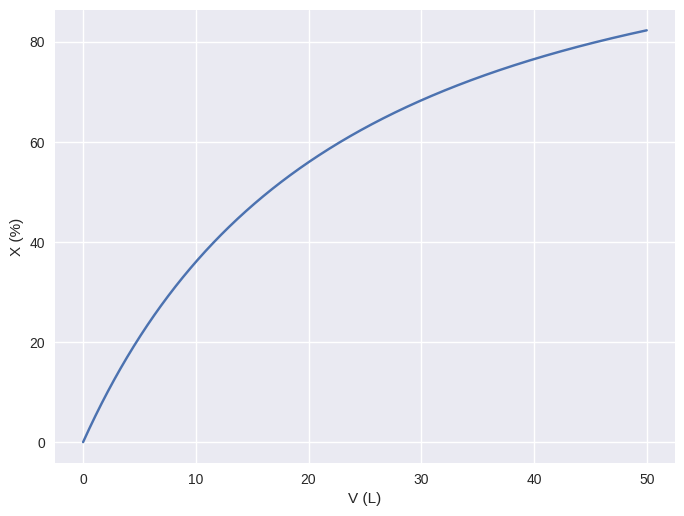

In [97]:
plt.figure(2, dpi=100, figsize=(8,6))
plt.plot(V, X*100)
plt.xlabel('V (L)')
plt.ylabel('X (%)')
plt.show()

In [98]:
X[-1]

0.8227065794951514